## FIFA : Exploratory Data Analysis 
FIFA 21 is a football simulation video game published by Electronic Arts as part of the FIFA series. It is the 28th installment in the FIFA series, and was released on 06 October 2020 for Microsoft Windows, PlayStation 4, Xbox One, and Nintendo Switch. 


#Table of Contents

#Importing Libraries and Exploring Data

#Data Manipualtion and Cleaning
    Deleted Useless Columns
    Formed a new column of BMI using Weights and Heights column
    Countered Null values using Get Dummies for Player positions
    For columns like Dribbling, Defendind,Pace etc used Median value
#Data Analysis
    Relationship of Overall Rating and Value in Euros using Scatter Plot
    Relationship of Potential Rating and Wage in Euros using Scatter Plot
    Count of Preferred Foot and International Reputation using Count Plot
    Distribution of Age and BMI using Histogram
    Relationship of BMI vs Pace and Weight vs Pace using Reg Plot
#Top 20 Analysis
    Which Country has Max players in Top 20?
    Which Club has Max players in Top 20?
    Which type of player comes most in Top 20?
    Which age belongs to max players in Top 20?
#The Biggest Rivalry - Messi and Ronaldo
    Comparison of different attributes using Radar Plot
#Other Top Class Comparisons
    Comparison of Kevin De Bryne and Luka Modric using Radar Plot
    Comparison of Van Dijk and Sergio Ramos using Radar Plot
    Comparison of Harry Kane and Sergio Aguero using Radar Plot

# **1. Importing Libraries & Data Exploration**

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from math import pi #Used in Radar Plots

import seaborn as sns
sns.set_style(style='darkgrid')


import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('C:\\Users\\Subod\\Downloads\\Data Science\\Data Visulisation')

In [3]:
df = pd.read_csv('players_21.csv')

In [4]:
df.shape

(18944, 106)

In [5]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


# 2. Data Manipulation & Cleaning

In [14]:
waste_column = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']

In [15]:
df = df.drop(waste_column, axis = 1)

In [17]:
df['BMI'] = df ['weight_kg'] / (df['height_cm'] / 100) ** 2

In [18]:
new_position = df['player_positions'].str.get_dummies(sep=',').add_prefix('Position')

In [23]:
df =  pd.concat([df,new_position],axis = 1)
df =  df.drop('player_positions',axis=1)

In [24]:
columns = ['dribbling','defending','physic','passing','shooting','pace']

In [29]:
df[columns].isna().sum()

dribbling    2083
defending    2083
physic       2083
passing      2083
shooting     2083
pace         2083
dtype: int64

In [30]:
for col in columns:
  df[col] = df[col].fillna(df[col].median())

In [31]:
df = df.fillna(0)

In [32]:
df[columns].isnull().sum() #Verifying it Should be all zero

dribbling    0
defending    0
physic       0
passing      0
shooting     0
pace         0
dtype: int64

# 3. Analysis

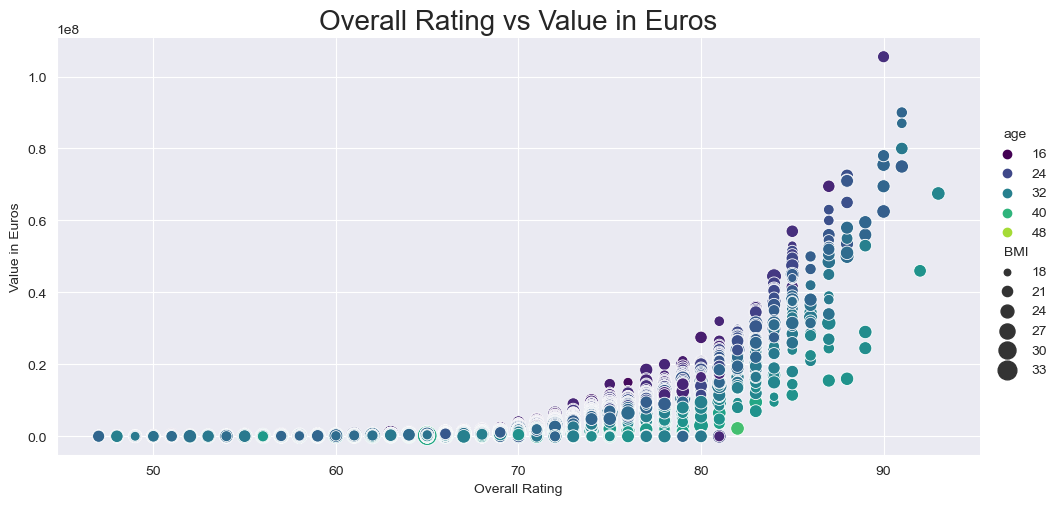

In [34]:
sns.relplot(x='overall',y='value_eur',hue='age',palette = 'viridis',size="BMI", sizes=(15, 200),aspect=2,data=df)
plt.title('Overall Rating vs Value in Euros',fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

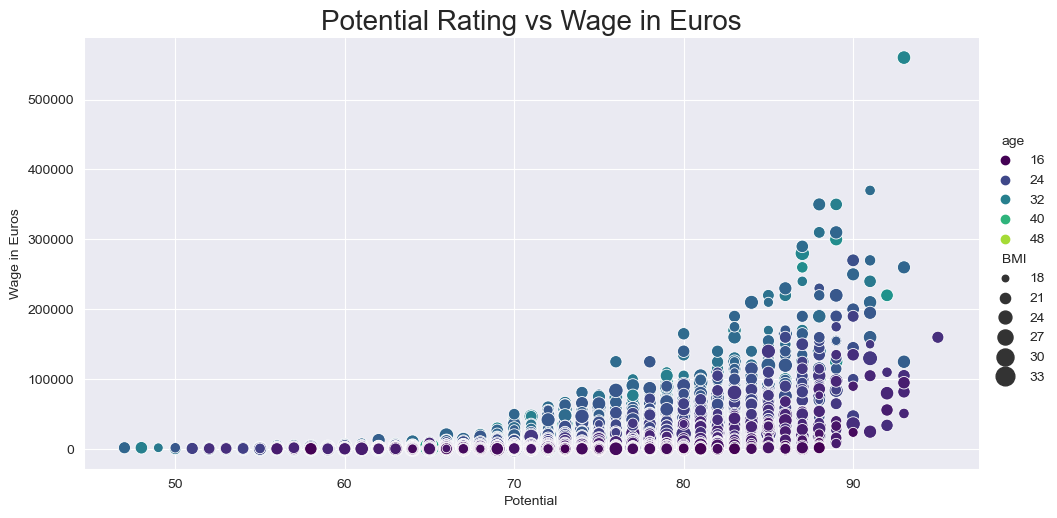

In [36]:
sns.relplot(x='potential',y='wage_eur',hue='age',palette = 'viridis',size="BMI", sizes=(15, 200),aspect=2,data=df)
plt.title('Potential Rating vs Wage in Euros',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Wage in Euros')
plt.show()

Left Preferred 4496
Right Preferred 14448


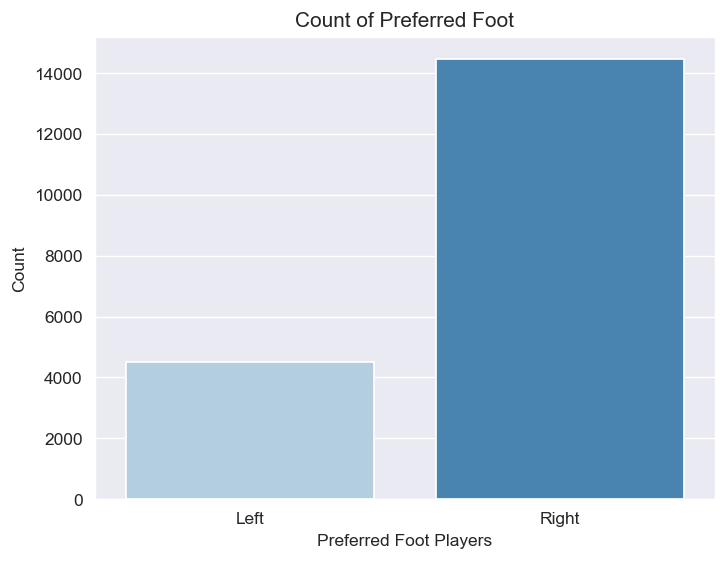

In [38]:
plt.figure(dpi=125)
sns.countplot(x='preferred_foot',data=df,palette='Blues')
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')
Right,Left=df.preferred_foot.value_counts()
print('Left Preferred',Left)
print('Right Preferred',Right)
plt.show()

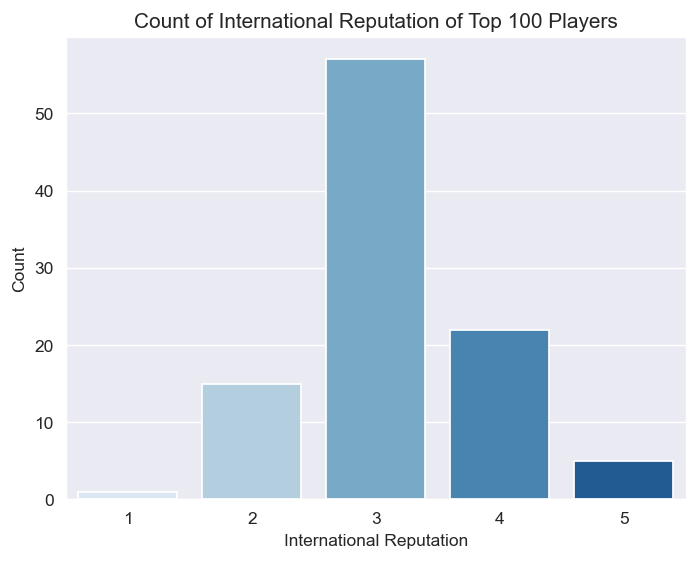

In [39]:
plt.figure(dpi=125)
sns.countplot(x='international_reputation',data=df.head(100),palette='Blues')
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.title('Count of International Reputation of Top 100 Players')
plt.show()

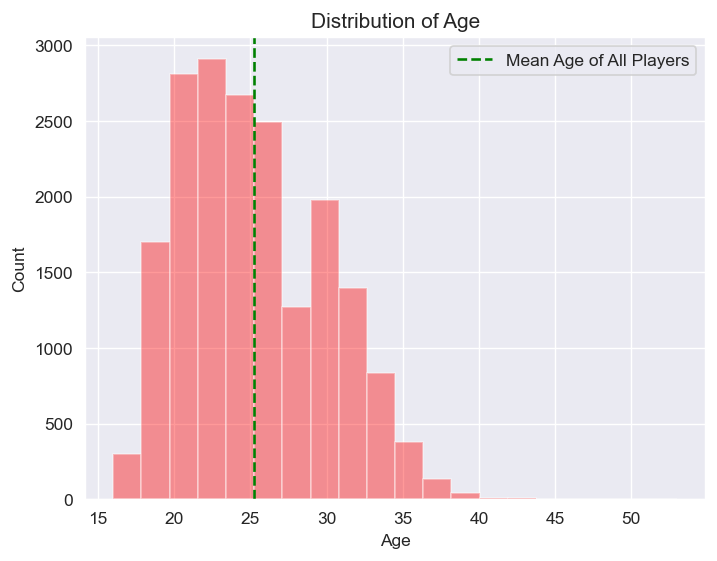

In [41]:
plt.figure(dpi=125)
sns.distplot(a=df['age'],kde=False,bins=20,color='red')
plt.axvline(x=np.mean(df['age']),c='green',ls='--',label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

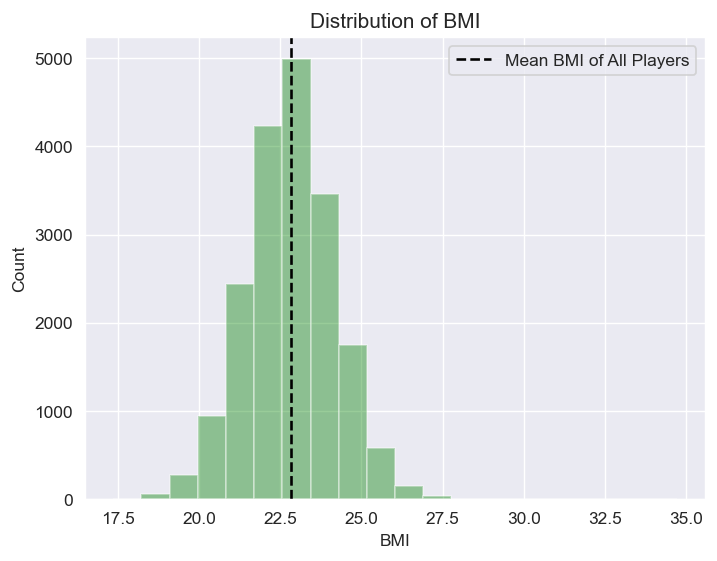

In [42]:
plt.figure(dpi=125)
sns.distplot(a=df['BMI'],kde=False,bins=20,color='green')
plt.axvline(x=np.mean(df['BMI']),c='black',ls='--',label='Mean BMI of All Players')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

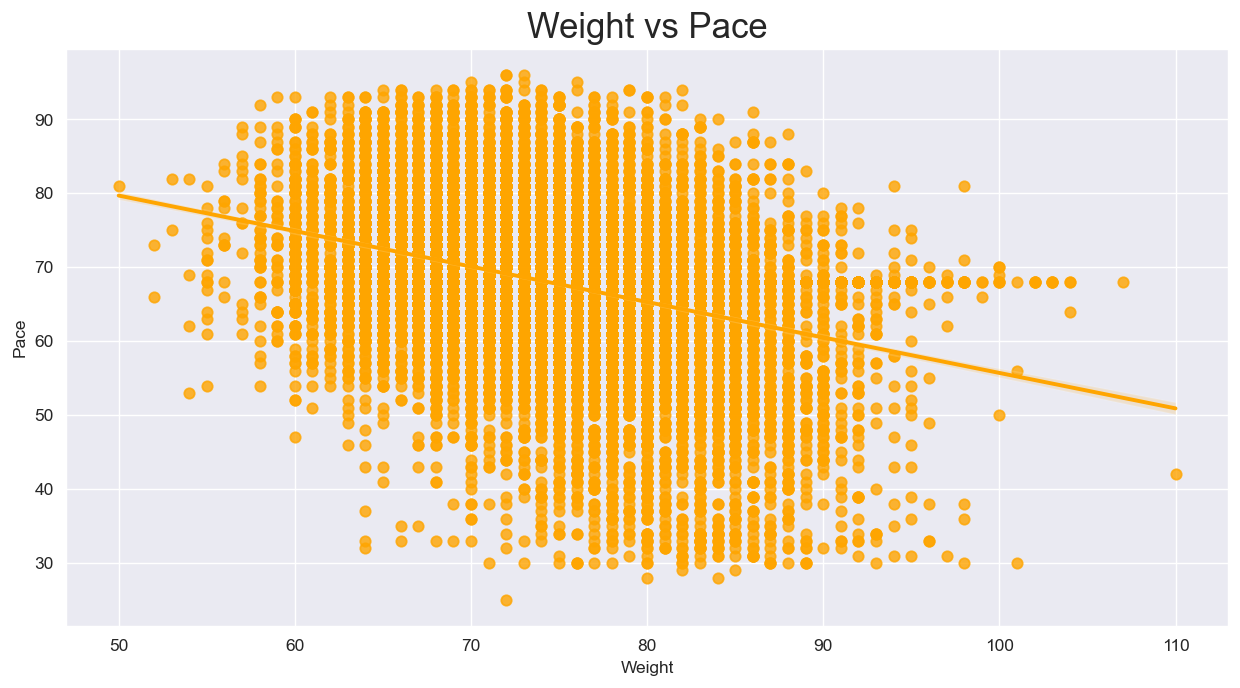

In [45]:
plt.figure(figsize=(12,6),dpi=125)
sns.regplot(x='weight_kg',y='pace',data = df, color='orange')
plt.title('Weight vs Pace',fontsize = 20)
plt.xlabel('Weight')
plt.ylabel('Pace')
plt.show()

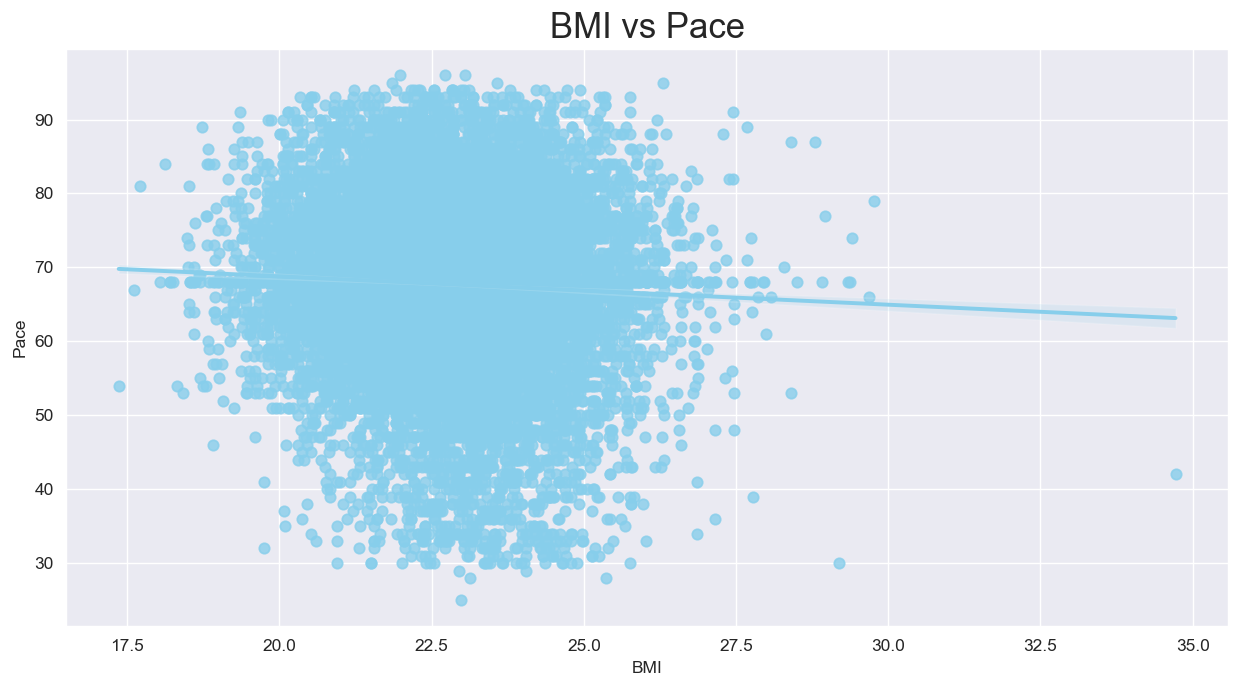

In [46]:
plt.figure(figsize=(12,6),dpi=125)

sns.regplot(x='BMI',y='pace', data =df,color='skyblue')
plt.title('BMI vs Pace',fontsize=20)
plt.xlabel('BMI')
plt.ylabel('Pace')
plt.show()

# **3.1 - Top 20 Analysis**

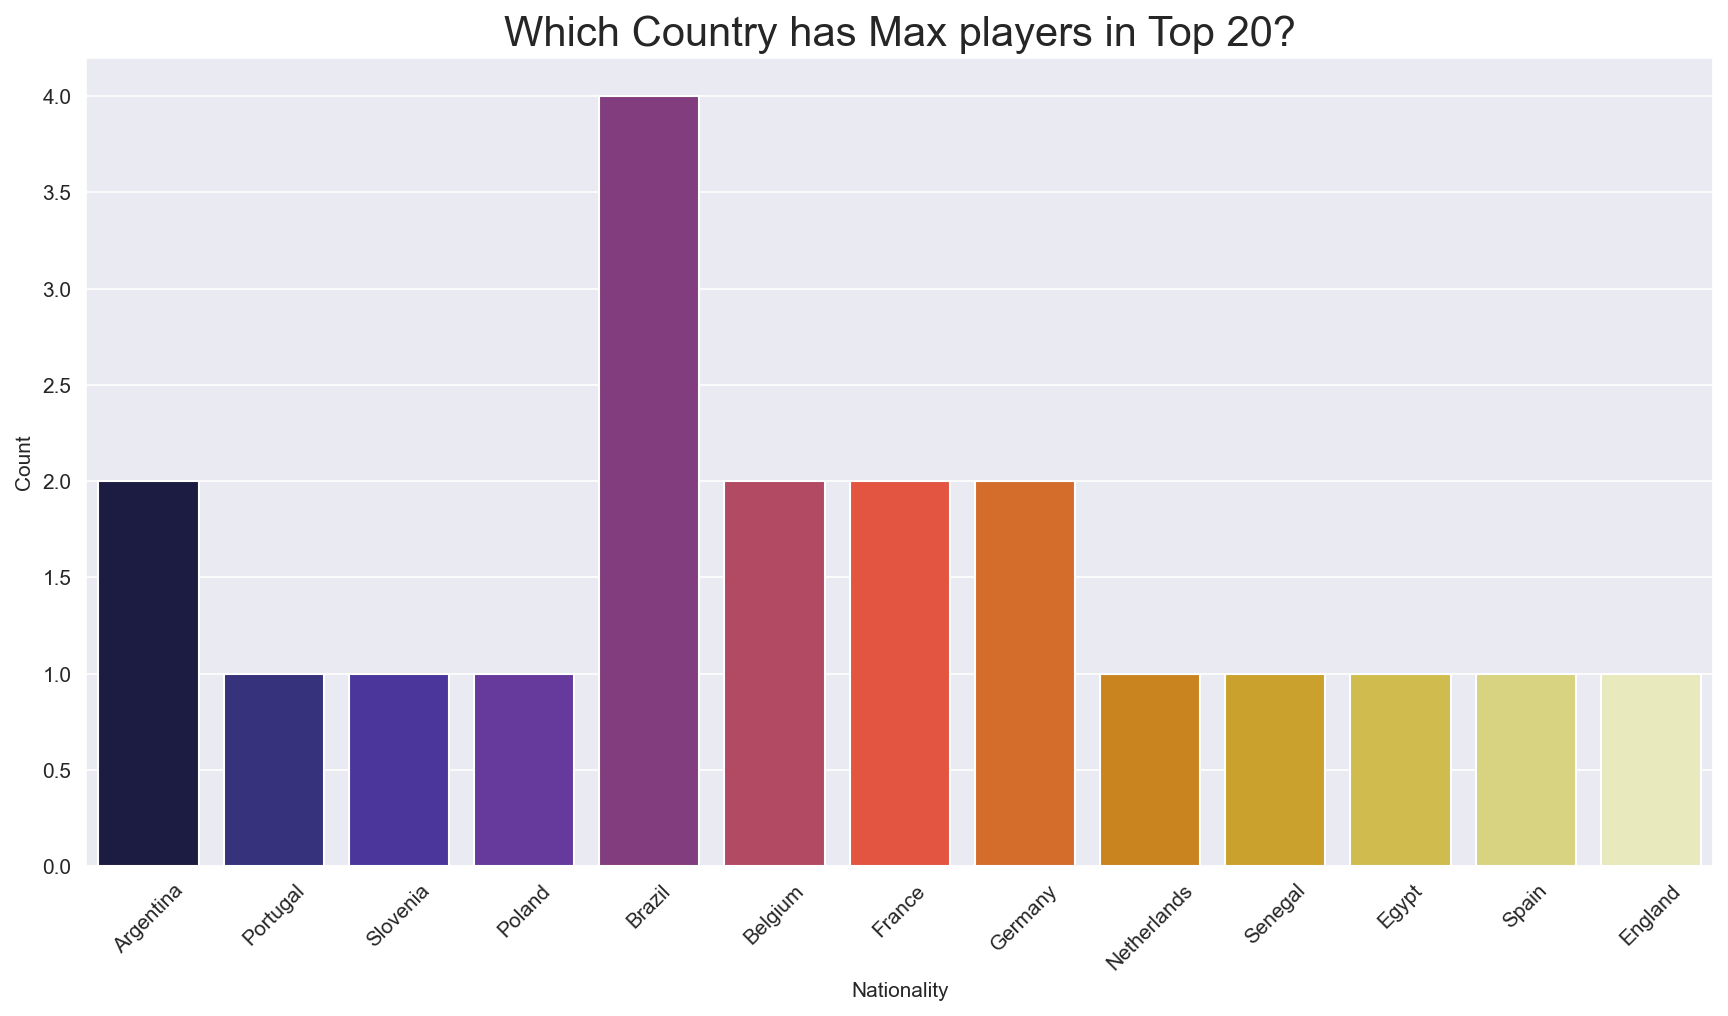

In [47]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot(x='nationality',data=df.head(20),palette='CMRmap')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Country has Max players in Top 20?',fontsize = 20)
plt.show()

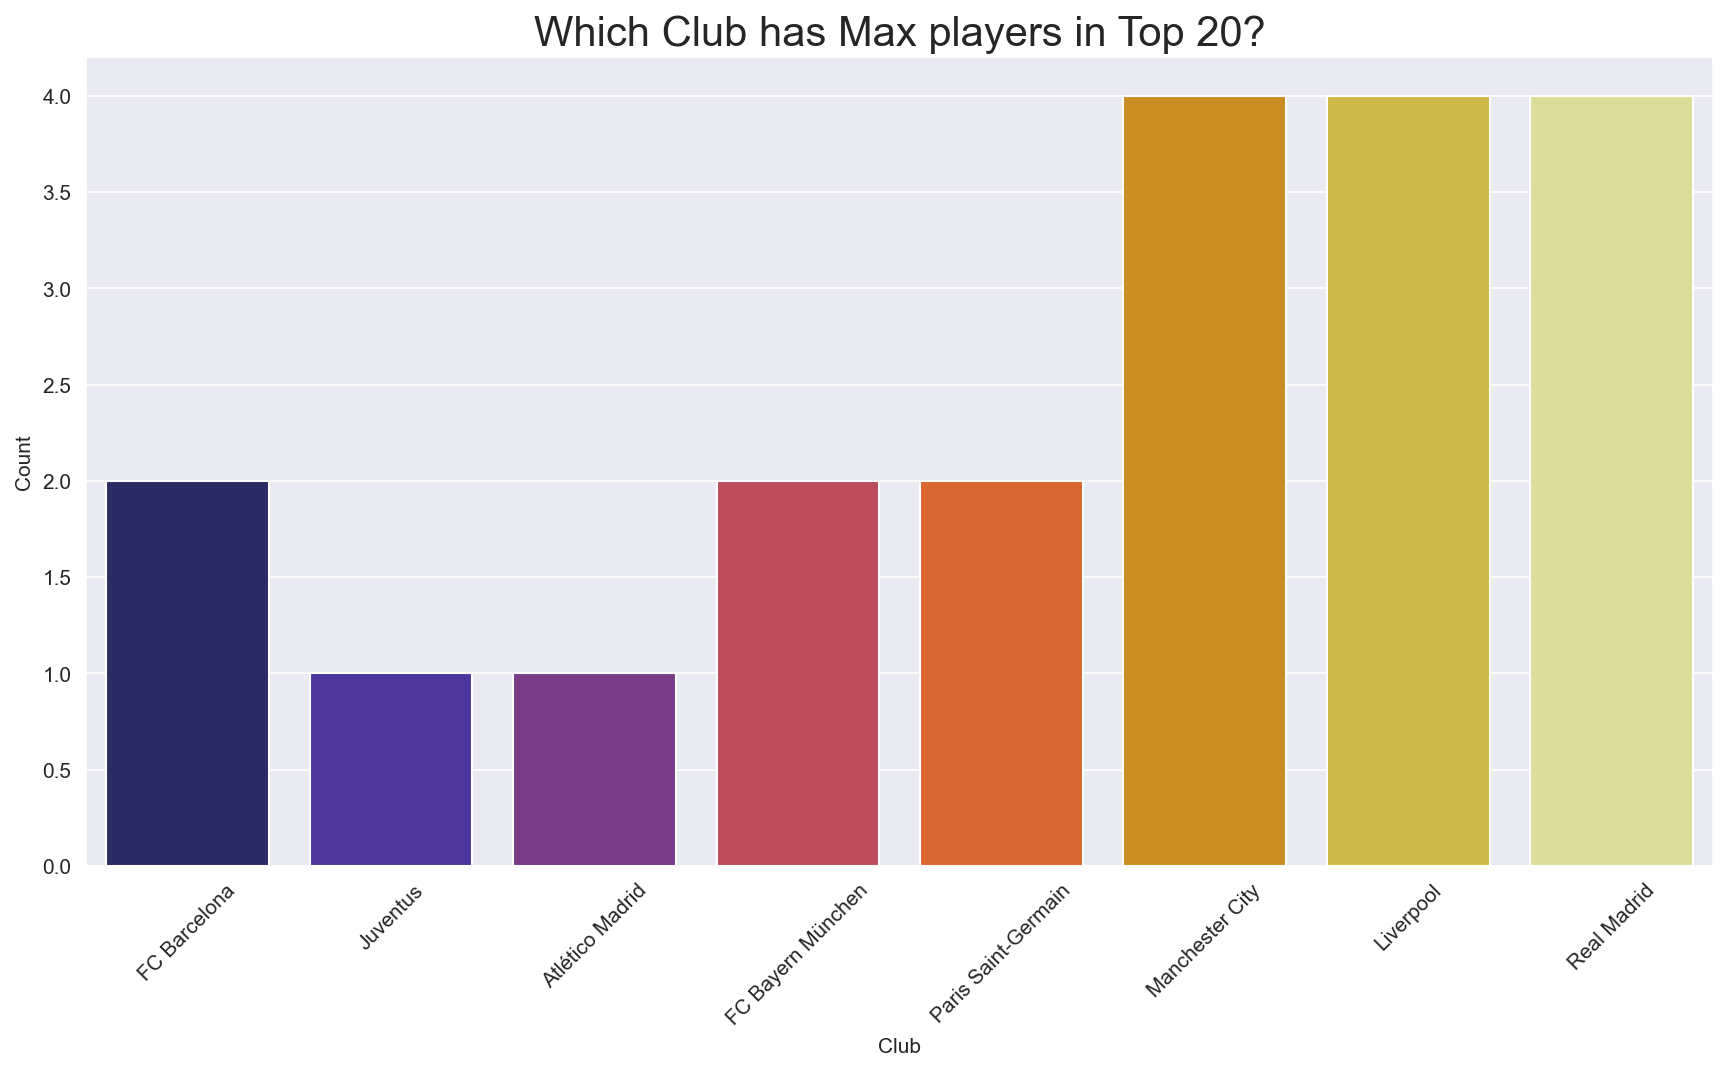

In [49]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot(x='club_name',data=df.head(20),palette='CMRmap')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Club has Max players in Top 20?',fontsize = 20)
plt.show()

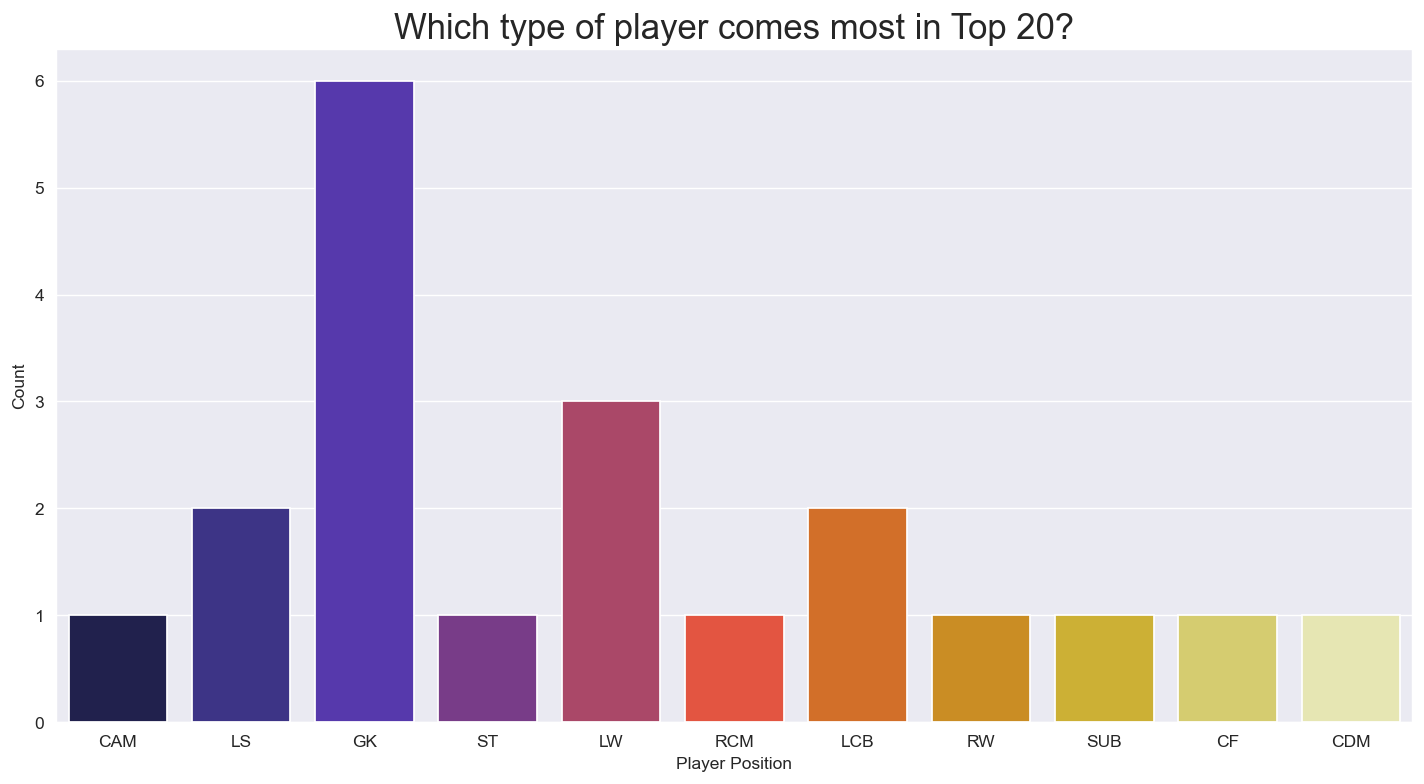

In [51]:
plt.figure(figsize=(14,7),dpi=125)
sns.countplot(x='team_position',data=df.head(20),palette='CMRmap')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.title('Which type of player comes most in Top 20?',fontsize = 20)
plt.show()

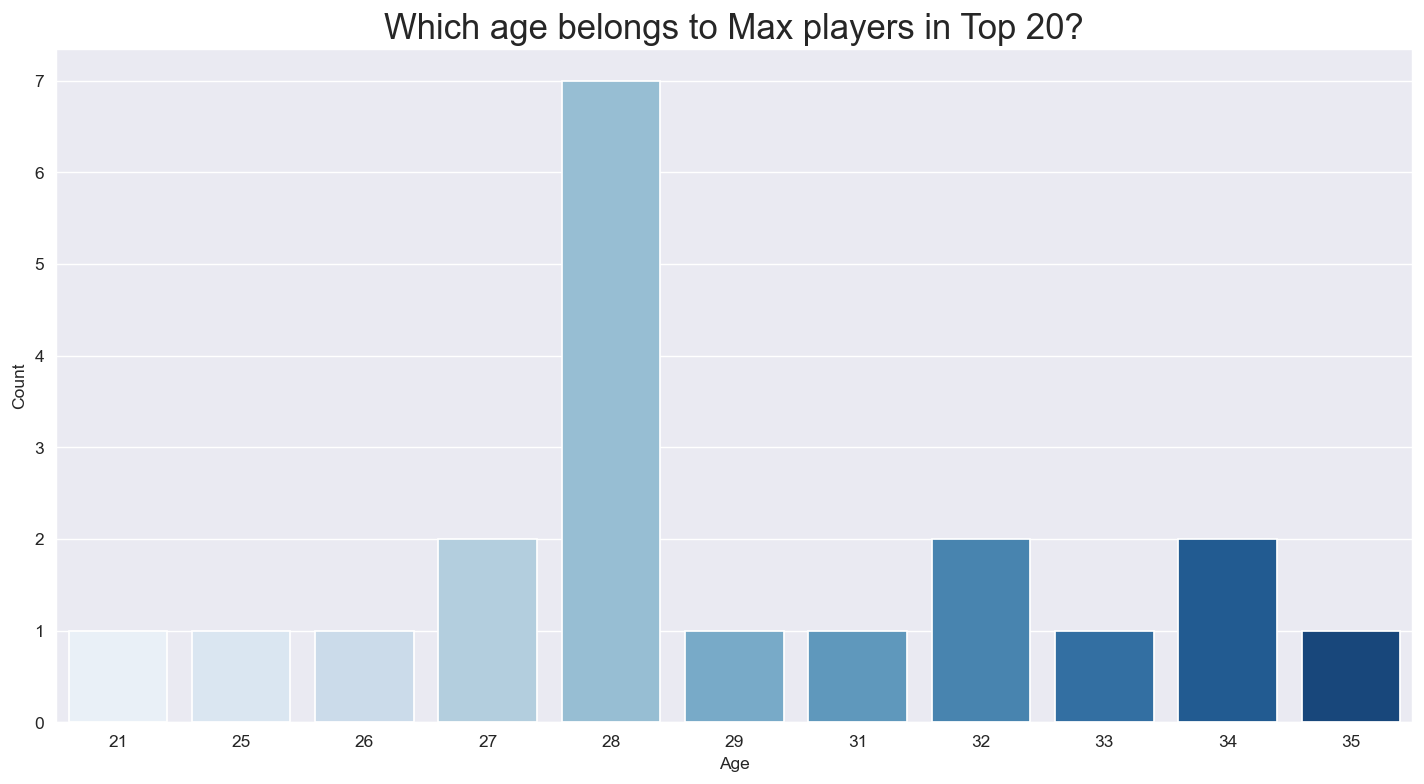

In [52]:
plt.figure(figsize=(14,7),dpi=125)
sns.countplot(x='age',data=df.head(20),palette='Blues')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Which age belongs to Max players in Top 20?',fontsize = 20)
plt.show()

# **3.2 - The Biggest Rivalry - MESSI VS RONALDO**

In [53]:
column_r=['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']
rival = fifa_21.head(2)[column_r]
rival= rival.set_index('short_name')
rival.head()

,overall,potential,pace,shooting,passing,dribbling,defending,physic
short_name,,,,,,,,
L. Messi,93,93,85.0,92.0,91.0,95.0,38.0,65.0
Cristiano Ronaldo,92,92,89.0,93.0,81.0,89.0,35.0,77.0


In [54]:
values = rival.iloc[0].tolist()
values += values [:1]
values

[93.0, 93.0, 85.0, 92.0, 91.0, 95.0, 38.0, 65.0, 93.0]

In [55]:
values2 = rival.iloc[1].tolist()
values2 += values2[:1]
values2

[92.0, 92.0, 89.0, 93.0, 81.0, 89.0, 35.0, 77.0, 92.0]

In [56]:
def RadarChart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'red', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

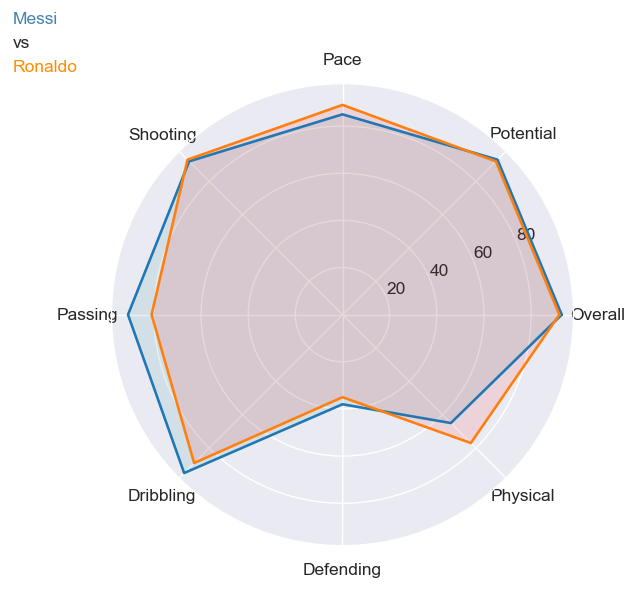

In [57]:
RadarChart("Messi",[94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0],"Ronaldo",[93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0])

**Insights:**
Out of 8 attributes - **Messi performed well in 5** and **Ronaldo in 3**

# **3.3 - Some other Top Class Comparisons**

# column_r=['short_name','age','team_position','overall','potential','pace','shooting','passing','dribbling','defending','physic']
riv = df[column_r]
riv = riv.set_index(['short_name','team_position','age'])

In [60]:
def Radarchart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,value)
    ax.fill(angles, value, 'teal', alpha=0.1)

    ax.plot(angles2,value2)
    ax.fill(angles2, value2, 'red', alpha=0.1)
    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

Now let's compare top two Midfielders as per the dataset i.e **De Bryne** and **Modric**

In [61]:
value = riv.iloc[5].tolist()
value += value[:1]
value

[91.0, 91.0, 76.0, 86.0, 93.0, 88.0, 64.0, 78.0, 91.0]

In [62]:
# Let's find values for Modric - Madrid's Midfielder
value2 = riv.iloc[8].tolist()
value2 += value2[:1]
value2

[90.0, 91.0, 76.0, 60.0, 71.0, 71.0, 91.0, 86.0, 90.0]

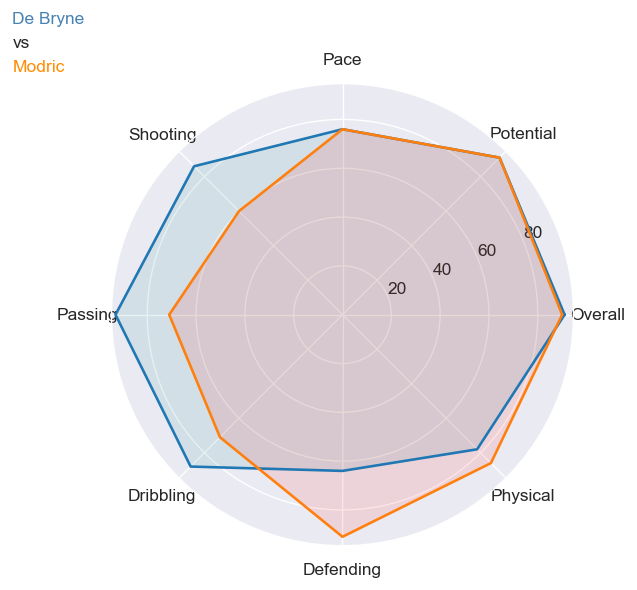

In [63]:
Radarchart("De Bryne",[91.0, 91.0, 76.0, 86.0, 92.0, 86.0, 61.0, 78.0, 91.0],"Modric",[90.0, 90.0, 74.0, 76.0, 89.0, 89.0, 72.0, 66.0, 90.0])

Now let's compare top two Defenders of current era as per me i.e **Ramos** and **Van Dijk**

In [65]:
# Let's find values for Ramos - Madrids's Defender
value = riv.iloc[18].tolist()
value += value[:1]
value

[88.0, 91.0, 68.0, 54.0, 58.0, 64.0, 56.0, 66.0, 88.0]

In [66]:
# Let's find values for Van Dijk - Liverpools's Defender
value2 = riv.iloc[7].tolist()
value2 += value2[:1]
value2

[90.0, 93.0, 68.0, 54.0, 58.0, 64.0, 56.0, 66.0, 90.0]

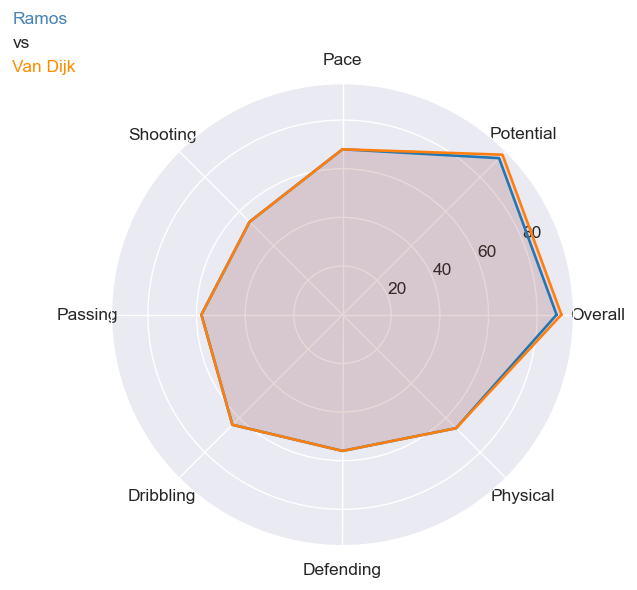

In [67]:
Radarchart("Ramos",[89.0, 89.0, 72.0, 68.0, 75.0, 73.0, 87.0, 85.0, 89.0],"Van Dijk",[90.0, 91.0, 77.0, 60.0, 70.0, 71.0, 90.0, 86.0, 90.0])

Now let's compare top two Strikers as per the dataset i.e **Kane** and **Aguero**

In [68]:
# Let's find values for Kane - Tottenham's Striker
value = riv.iloc[12].tolist()
value += value[:1]
value

[89.0, 90.0, 68.0, 54.0, 58.0, 64.0, 56.0, 66.0, 89.0]

In [69]:
# Let's find values for Aguero - Man City's Striker
value2 = riv.iloc[17].tolist()
value2 += value2[:1]
value2

[89.0, 89.0, 65.0, 73.0, 76.0, 72.0, 86.0, 91.0, 89.0]

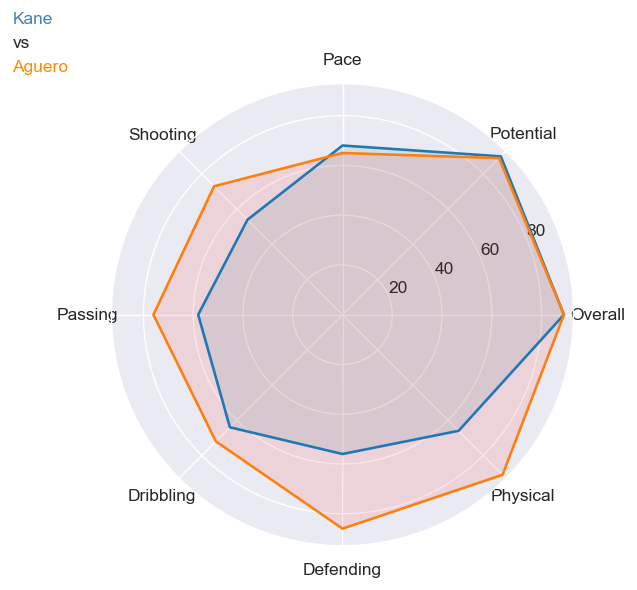

In [70]:
Radarchart("Kane",[89.0, 91.0, 70.0, 91.0, 79.0, 81.0, 47.0, 83.0, 89.0],"Aguero",[89.0, 89.0, 80.0, 90.0, 77.0, 88.0, 33.0, 74.0, 89.0])